In [1]:
import yfinance as yahooFinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)

In [2]:
def calculate_pct_diff(row):
    pct_diff = []
    for i in range(len(row) - 1):
        # Check for non-missing values and non-zero denominator
        if pd.notna(row.iloc[i+1]) and pd.notna(row.iloc[i]) and row.iloc[i+1] != 0:
            diff = ((row.iloc[i] - row.iloc[i+1]) / row.iloc[i+1]) * 100
            pct_diff.append(diff)
        else:
            pct_diff.append(np.nan)  # Append NaN if denominator is zero or values are missing
    return pct_diff

In [3]:
ticker = "VOW3.DE"

 # 1. Stock Information

In [4]:
stock = yahooFinance.Ticker(ticker)

In [5]:
stock_info = stock.info
stock_info

{'address1': 'Berliner Ring 2',
 'city': 'Wolfsburg',
 'zip': '38440',
 'country': 'Germany',
 'phone': '49 5361 9 0',
 'fax': '49 5361 9 28282',
 'website': 'https://www.volkswagen-group.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Volkswagen AG manufactures and sells automobiles in Germany, other European countries, North America, South America, the Asia-Pacific, and internationally. It operates through four segments: Passenger Cars and Light Commercial Vehicles, Commercial Vehicles, Power Engineering, and Financial Services. The Passenger Cars and Light Commercial Vehicles segment engages in the development of vehicles, engines, motors, vehicle software and batteries; produces and sells passenger cars and light commercial vehicles, and related parts; and offers motorcycles. The Commerc

In [6]:
market_cap = stock_info['marketCap']
market_cap

54615912448

In [7]:
exchange = stock_info['exchange']
exchange

'GER'

In [8]:
averageVolume = stock_info['averageVolume']
averageVolume

1266485

In [9]:
averageVolume10days = stock_info['averageVolume10days']
averageVolume10days

1539185

In [10]:
currentPrice = stock_info['currentPrice']
currentPrice

101.45

In [11]:
fiftyDayAverage_stockPrice = stock_info['fiftyDayAverage']
fiftyDayAverage_stockPrice

99.7758

In [12]:
twoHundredDayAverage_StockPrice = stock_info['twoHundredDayAverage']
twoHundredDayAverage_StockPrice

95.08185

In [13]:
try:
  trailingPE = stock_info['trailingPE']
  print(trailingPE)
except Exception:
  print("An exception occurred") 

4.7495317


In [14]:
try:
  forwardPE = stock_info['forwardPE']
  print(forwardPE)
except Exception:
  print("An exception occurred") 

3.772778


In [15]:
priceToBook = stock_info['priceToBook']
priceToBook

0.30199024

In [16]:
currentRatio = stock_info['currentRatio']
currentRatio

1.13

In [17]:
trailingEps = stock_info['trailingEps']
trailingEps

21.36

In [18]:
forwardEps = stock_info['forwardEps']
forwardEps

26.89

In [19]:
try:
  earningsGrowth = stock_info['earningsGrowth']
  print(earningsGrowth)
except Exception:
  print("An exception occurred") 

-0.319


In [20]:
try:
  beta = stock_info['beta']
  print(beta)
except Exception:
  print("An exception occurred")

1.238


In [21]:
try:
  recommendationKey = stock_info['recommendationKey']
  print(recommendationKey)
except Exception:
  print("An exception occurred") 

buy


In [22]:
try:
  shareHolderRightsRisk = stock_info['shareHolderRightsRisk']
  print(shareHolderRightsRisk)
except Exception:
  print("An exception occurred") 

10


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

 # 2. Holders

In [23]:
try:
  print(stock.major_holders)
except Exception:
  print("An exception occurred") 

Breakdown                         Value
insidersPercentHeld             0.00000
institutionsPercentHeld         0.22737
institutionsFloatPercentHeld    0.22737
institutionsCount             429.00000


In [24]:
try:
  print(stock.institutional_holders)
except Exception:
  print("An exception occurred") 

  Date Reported                Holder  pctHeld  Shares  Value  pctChange
0    2024-12-31  Pacer Advisors, Inc.      0.0     396  40174     0.0051


In [25]:
try:
  print(stock.mutualfund_holders)
except:
  print("An exception occurred") 

  Date Reported                                           Holder  pctHeld  \
0    2024-10-31    Vanguard Total International Stock Index Fund   0.0124   
1    2024-12-31            Vanguard Developed Markets Index Fund   0.0077   
2    2025-01-31                       iShares Core MSCI EAFE ETF   0.0063   
3    2024-12-31  Price (T.Rowe) International Value Equity Trust   0.0048   
4    2024-12-31    T. Rowe Price International Value Equity Fund   0.0039   
5    2025-01-31                            iShares MSCI EAFE ETF   0.0033   
6    2024-12-31                 T. Rowe Price Equity Income Fund   0.0032   
7    2025-01-31                Fidelity International Index Fund   0.0031   
8    2024-11-30      Schwab Fundamental International Equity ETF   0.0031   
9    2025-01-31        iShares International Select Dividend ETF   0.0027   

    Shares      Value  pctChange  
0  2550333  258731275     0.0053  
1  1583252  160620910     0.0125  
2  1297647  131646284     0.0039  
3   983069  

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 3. Actions - Dividends & Stock Splits

In [26]:
stock.actions

,Dividends,Stock Splits
Date,,
2000-05-24 00:00:00+02:00,0.825037,0.0
2001-06-08 00:00:00+02:00,1.252466,0.0
2002-04-17 00:00:00+02:00,1.351869,0.0
2003-04-25 00:00:00+02:00,1.351869,0.0
2004-02-18 00:00:00+01:00,0.371213,0.0
2004-04-23 00:00:00+02:00,1.103363,0.0
2005-02-16 00:00:00+01:00,0.549021,0.0
2005-04-22 00:00:00+02:00,1.103363,0.0
2006-02-15 00:00:00+01:00,0.274510,0.0


In [27]:
df_dividends = pd.DataFrame(stock.dividends)
df_new_dividends = df_dividends.groupby(['Date']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends

,Date,Dividends
0,2000-05-24 00:00:00+02:00,0.825037
1,2001-06-08 00:00:00+02:00,1.252466
2,2002-04-17 00:00:00+02:00,1.351869
3,2003-04-25 00:00:00+02:00,1.351869
4,2004-02-18 00:00:00+01:00,0.371213
5,2004-04-23 00:00:00+02:00,1.103363
6,2005-02-16 00:00:00+01:00,0.549021
7,2005-04-22 00:00:00+02:00,1.103363
8,2006-02-15 00:00:00+01:00,0.274510
9,2006-05-04 00:00:00+02:00,1.202765


In [28]:
df_new_dividends['Date_in_Datetime'] = pd.to_datetime(df_new_dividends['Date'])
df_new_dividends['Year'] = df_new_dividends['Date_in_Datetime'].dt.year
df_new_dividends

,Date,Dividends,Date_in_Datetime,Year
0,2000-05-24 00:00:00+02:00,0.825037,2000-05-24 00:00:00+02:00,2000
1,2001-06-08 00:00:00+02:00,1.252466,2001-06-08 00:00:00+02:00,2001
2,2002-04-17 00:00:00+02:00,1.351869,2002-04-17 00:00:00+02:00,2002
3,2003-04-25 00:00:00+02:00,1.351869,2003-04-25 00:00:00+02:00,2003
4,2004-02-18 00:00:00+01:00,0.371213,2004-02-18 00:00:00+01:00,2004
5,2004-04-23 00:00:00+02:00,1.103363,2004-04-23 00:00:00+02:00,2004
6,2005-02-16 00:00:00+01:00,0.549021,2005-02-16 00:00:00+01:00,2005
7,2005-04-22 00:00:00+02:00,1.103363,2005-04-22 00:00:00+02:00,2005
8,2006-02-15 00:00:00+01:00,0.274510,2006-02-15 00:00:00+01:00,2006
9,2006-05-04 00:00:00+02:00,1.202765,2006-05-04 00:00:00+02:00,2006


In [29]:
df_new_dividends_converted= df_new_dividends.groupby(['Year']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends_converted

,Year,Dividends
0,2000,0.825037
1,2001,1.252466
2,2002,1.351869
3,2003,1.351869
4,2004,1.474576
5,2005,1.652384
6,2006,1.477276
7,2007,1.302167
8,2008,1.848879
9,2009,1.978102


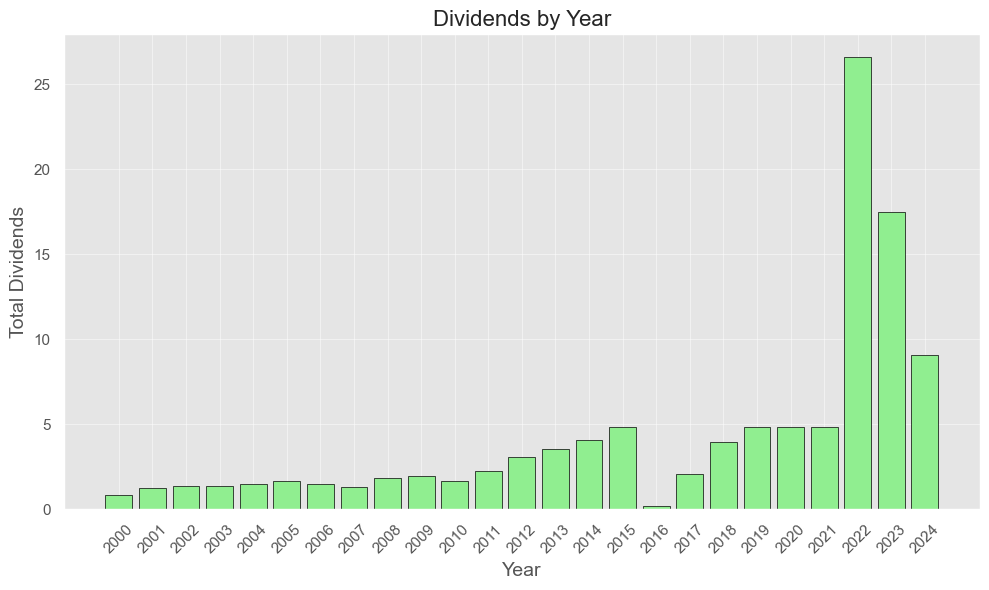

In [30]:
try:
    # Apply a style with more contrast
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Use a more contrasting color for the bars
    plt.bar(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], color='lightgreen', edgecolor='black')

    # Set x-axis ticks to display every year, and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Add labels and title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Dividends', fontsize=14)
    plt.title('Dividends by Year', fontsize=16)

    # Improve grid visibility
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

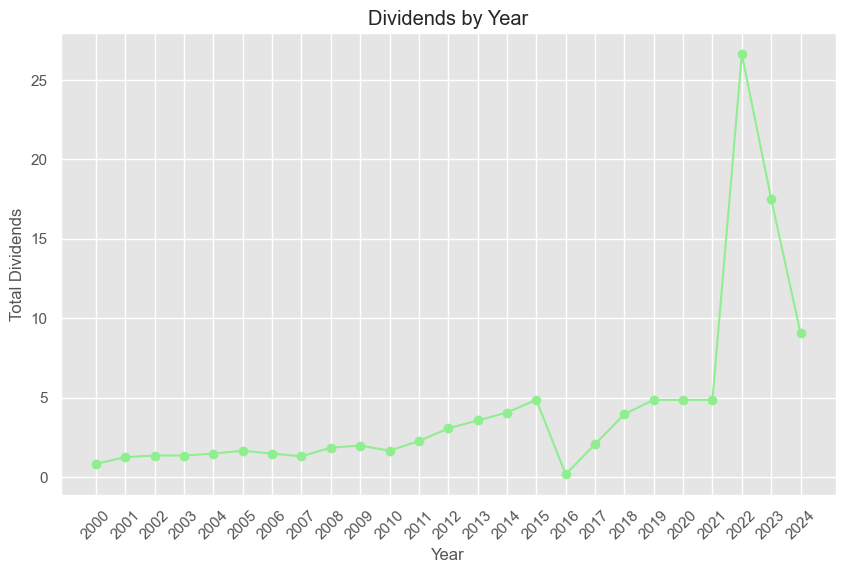

In [31]:
try:   
    # Define the style and figure size
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Plot the data
    plt.plot(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], marker = 'o', color='lightgreen')

    # Set x-axis ticks to display every year between 1 and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Dividends')
    plt.title('Dividends by Year')

    # Show grid and plot
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

In [32]:
try:
    dividend_Yield = stock_info['dividendYield']
    print(dividend_Yield)
except Exception:
    print("An exception occurred") 

6.19


In [33]:
try:
    trailingAnnualDividendYield = stock_info['trailingAnnualDividendYield']
    print(trailingAnnualDividendYield)
except Exception:
    print("An exception occurred") 

0.061867703


In [34]:
try:
    avg_DvidendYield_5_years = stock_info['fiveYearAvgDividendYield']
    print(avg_DvidendYield_5_years)
except Exception:
    print("An exception occurred") 

2.31


In [35]:
try:
    payoutRatio = stock_info['payoutRatio']
    print(payoutRatio)
except Exception:
    print("An exception occurred") 

0.42419997


In [36]:
stock.splits

Series([], Name: Stock Splits, dtype: float64)

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 4. Balance Sheet Statement

In [37]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Ordinary Shares Number,5.012953e+08,5.012953e+08,5.012953e+08,5.012953e+08,NaN
Share Issued,5.012953e+08,5.012953e+08,5.012953e+08,5.012953e+08,NaN
Net Debt,1.490480e+11,1.440300e+11,1.428790e+11,1.374010e+11,NaN
Total Debt,1.965200e+11,1.939720e+11,1.784360e+11,1.833700e+11,NaN
Tangible Book Value,8.896100e+10,8.585900e+10,8.213500e+10,6.676000e+10,NaN
Invested Capital,3.716380e+11,3.624470e+11,3.374270e+11,3.215740e+11,NaN
Working Capital,2.819200e+10,3.360800e+10,4.143600e+10,3.595400e+10,NaN
Net Tangible Assets,8.896100e+10,8.585900e+10,8.213500e+10,6.676000e+10,NaN
Capital Lease Obligations,7.176000e+09,6.493000e+09,6.385000e+09,6.245000e+09,NaN
Common Stock Equity,1.822940e+11,1.749680e+11,1.653760e+11,1.444490e+11,NaN


In [38]:
balance_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, Ordinary Shares Number to Cash Financial
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2024-12-31 00:00:00  80 non-null     float64
 1   2023-12-31 00:00:00  80 non-null     float64
 2   2022-12-31 00:00:00  80 non-null     float64
 3   2021-12-31 00:00:00  80 non-null     float64
 4   2020-12-31 00:00:00  1 non-null      float64
dtypes: float64(5)
memory usage: 3.8+ KB


## 4.1 Retained Earnings

In [39]:
try:
  retained_earnings = balance_sheet_df.loc['Retained Earnings']
  retained_earnings_df = retained_earnings.to_frame(name='Retained Earnings')
  print(retained_earnings_df)
except Exception:
  print("An exception occurred") 

            Retained Earnings
2024-12-31       1.551300e+11
2023-12-31       1.471040e+11
2022-12-31       1.372720e+11
2021-12-31       1.173420e+11
2020-12-31                NaN


In [40]:
try:
    # Calculate percentage changes
    retained_earnings_pct_diff = calculate_pct_diff(balance_sheet_df.loc['Retained Earnings'])
    
    # Convert result into a DataFrame for readability
    retained_earnings_pct_diff_df = pd.DataFrame(
        [retained_earnings_pct_diff],
        columns = balance_sheet_df.columns[:-1],  # Exclude the last column since it has no comparison
        index=['% Change in Retained Earnings']
    )
    print(retained_earnings_pct_diff)
except Exception:
    print("An exception occurred") 
    

[5.456003915597128, 7.162422052567166, 16.984540914591538, nan]


In [41]:
try:
    retained_earnings_pct_diff_df_T  = retained_earnings_pct_diff_df.T
    print(retained_earnings_pct_diff_df_T)
except Exception:
    print("An exception occurred") 

            % Change in Retained Earnings
2024-12-31                       5.456004
2023-12-31                       7.162422
2022-12-31                      16.984541
2021-12-31                            NaN


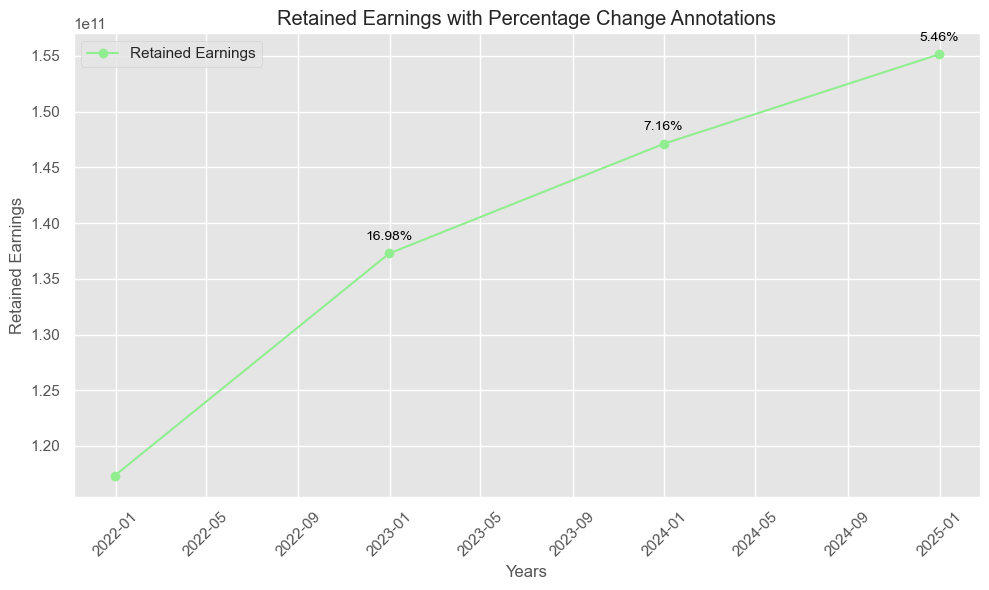

In [42]:
try:
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the Retained Earnings data
    ax.plot(retained_earnings_df.index, retained_earnings_df['Retained Earnings'], marker='o', color='lightgreen', label='Retained Earnings')

    # Annotate the plot with percentage change values from retained_earnings_pct_diff_df_T
    for date, pct_change in retained_earnings_pct_diff_df_T['% Change in Retained Earnings'].items():
        if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
            ax.annotate(f'{pct_change:.2f}%', 
                        xy=(date, retained_earnings_df.loc[date, 'Retained Earnings']), 
                        xytext=(0, 10),  # Offset to place text above the marker
                        textcoords='offset points',
                        fontsize=10, 
                        color='black', 
                        ha='center')  # Align text horizontally at the center of the point

    # Set labels and title
    plt.xlabel('Years')
    plt.ylabel('Retained Earnings')
    plt.title('Retained Earnings with Percentage Change Annotations')

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An exception occurred: {e}")

## 4.2 Liabilities

In [43]:
balance_df_liabilities = balance_sheet_df.loc[['Payables','Current Debt And Capital Lease Obligation','Current Liabilities','Long Term Debt And Capital Lease Obligation', 'Total Capitalization']]
balance_df_liabilities

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Payables,3.598400e+10,3.664300e+10,3.384500e+10,2.783400e+10,NaN
Current Debt And Capital Lease Obligation,6.338700e+10,7.488700e+10,5.934100e+10,5.434100e+10,NaN
Current Liabilities,2.170390e+11,2.060360e+11,1.827230e+11,1.643930e+11,NaN
Long Term Debt And Capital Lease Obligation,1.331330e+11,1.190850e+11,1.190950e+11,1.290290e+11,NaN
Total Capitalization,3.095030e+11,2.886720e+11,2.791880e+11,2.683410e+11,NaN


In [44]:
pct_diff_balance_df_liabilities = balance_df_liabilities.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_liabilities.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_liabilities

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Payables,-1.798434,8.267100,21.595890,NaN
Current Debt And Capital Lease Obligation,-15.356470,26.197738,9.201156,NaN
Current Liabilities,5.340329,12.758657,11.150110,NaN
Long Term Debt And Capital Lease Obligation,11.796616,-0.008397,-7.699044,NaN
Total Capitalization,7.216148,3.396994,4.042245,NaN


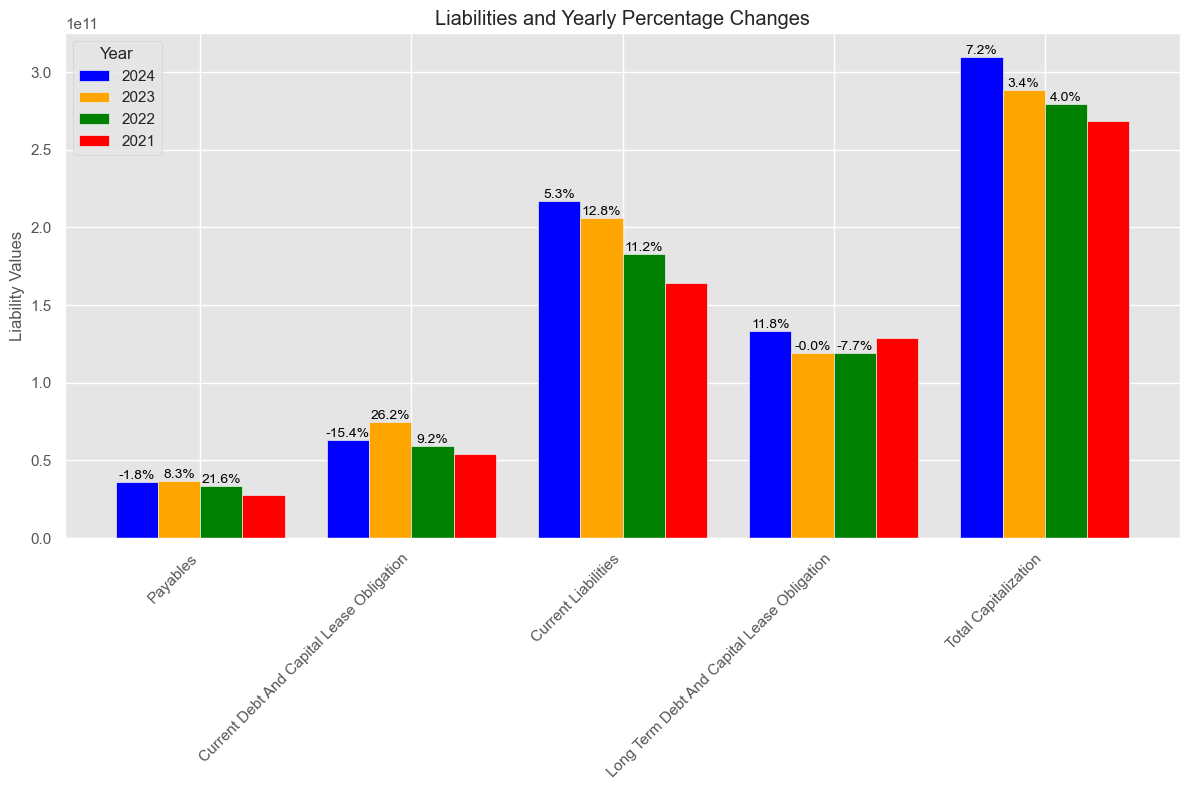

In [45]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_liabilities.columns]
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(balance_df_liabilities.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_liabilities.columns[:-1], colors)):
    values = balance_df_liabilities[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_liabilities.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_liabilities.index, rotation=45, ha='right')
ax.set_ylabel("Liability Values")
ax.set_title("Liabilities and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.3 Assets 

In [46]:
balance_df_assets = balance_sheet_df.loc[['Accounts Receivable','Cash And Cash Equivalents','Current Assets','Net PPE','Goodwill And Other Intangible Assets']]
balance_df_assets

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Accounts Receivable,6.768700e+10,6.720300e+10,6.020200e+10,5.275000e+10,NaN
Cash And Cash Equivalents,4.029600e+10,4.344900e+10,2.917200e+10,3.972400e+10,NaN
Current Assets,2.452310e+11,2.396440e+11,2.241590e+11,2.003470e+11,NaN
Net PPE,1.446440e+11,1.309750e+11,1.232710e+11,1.233940e+11,NaN
Goodwill And Other Intangible Assets,9.333300e+10,8.910900e+10,8.324100e+10,7.768900e+10,NaN


In [47]:
pct_diff_balance_df_assets = balance_df_assets.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_assets.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_assets

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Accounts Receivable,0.720206,11.629182,14.127014,NaN
Cash And Cash Equivalents,-7.256784,48.940765,-26.563287,NaN
Current Assets,2.331375,6.908043,11.885379,NaN
Net PPE,10.436343,6.249645,-0.099681,NaN
Goodwill And Other Intangible Assets,4.740262,7.049411,7.146443,NaN


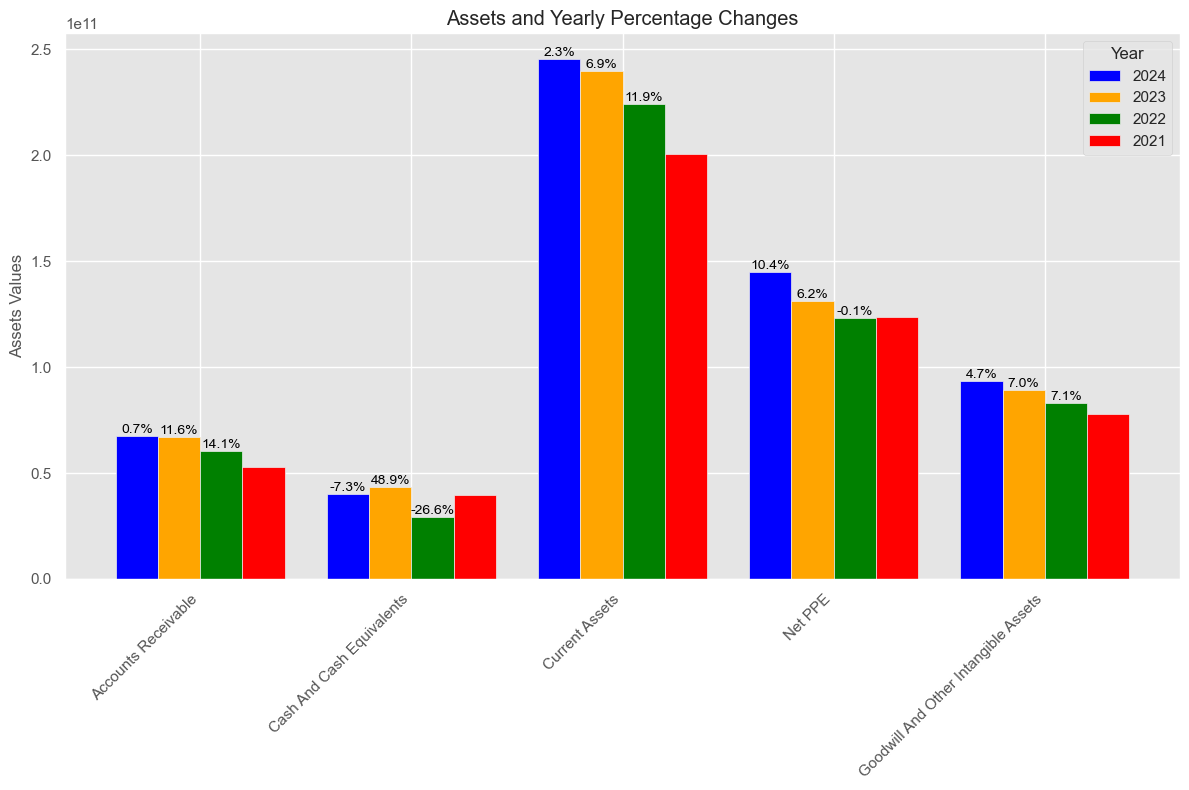

In [48]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_assets.columns]
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(balance_df_assets.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_assets.columns[:-1], colors)):
    values = balance_df_assets[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_assets.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_assets.index, rotation=45, ha='right')
ax.set_ylabel("Assets Values")
ax.set_title("Assets and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.4 Balance Sheet for the last year with Vertical Analysis

In [49]:
balance_sheet_df_last = pd.DataFrame(balance_sheet_df.iloc[:,0])
balance_sheet_df_last

,2024-12-31
Ordinary Shares Number,5.012953e+08
Share Issued,5.012953e+08
Net Debt,1.490480e+11
Total Debt,1.965200e+11
Tangible Book Value,8.896100e+10
Invested Capital,3.716380e+11
Working Capital,2.819200e+10
Net Tangible Assets,8.896100e+10
Capital Lease Obligations,7.176000e+09
Common Stock Equity,1.822940e+11


In [50]:
total_assets = balance_sheet_df_last.loc['Total Assets'].values[0]
balance_sheet_df_last['Percentage from Total Assets/Liabilities'] = balance_sheet_df_last.iloc[:, [0]] / total_assets * 100
balance_sheet_df_last

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities
Ordinary Shares Number,5.012953e+08,0.079205
Share Issued,5.012953e+08,0.079205
Net Debt,1.490480e+11,23.549822
Total Debt,1.965200e+11,31.050474
Tangible Book Value,8.896100e+10,14.055980
Invested Capital,3.716380e+11,58.719397
Working Capital,2.819200e+10,4.454381
Net Tangible Assets,8.896100e+10,14.055980
Capital Lease Obligations,7.176000e+09,1.133819
Common Stock Equity,1.822940e+11,28.802743


## 4.5 Balance Sheet for the previous year with Vertical Analysis

In [51]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df_prev = pd.DataFrame(balance_sheet_df.iloc[:,1])
balance_sheet_df_prev

,2023-12-31
Ordinary Shares Number,5.012953e+08
Share Issued,5.012953e+08
Net Debt,1.440300e+11
Total Debt,1.939720e+11
Tangible Book Value,8.585900e+10
Invested Capital,3.624470e+11
Working Capital,3.360800e+10
Net Tangible Assets,8.585900e+10
Capital Lease Obligations,6.493000e+09
Common Stock Equity,1.749680e+11


In [52]:
total_assets = balance_sheet_df_prev.loc['Total Assets'].values[0]
balance_sheet_df_prev['Percentage from Total Assets/Liabilities'] = balance_sheet_df_prev.iloc[:, [0]] / total_assets * 100
balance_sheet_df_prev

,2023-12-31 00:00:00,Percentage from Total Assets/Liabilities
Ordinary Shares Number,5.012953e+08,0.083459
Share Issued,5.012953e+08,0.083459
Net Debt,1.440300e+11,23.979063
Total Debt,1.939720e+11,32.293736
Tangible Book Value,8.585900e+10,14.294372
Invested Capital,3.624470e+11,60.342563
Working Capital,3.360800e+10,5.595281
Net Tangible Assets,8.585900e+10,14.294372
Capital Lease Obligations,6.493000e+09,1.080997
Common Stock Equity,1.749680e+11,29.129825


## 4.6 Balance Sheet for the last two years with Vertical Analysis

In [53]:
df_concat_balance = pd.concat([balance_sheet_df_last, balance_sheet_df_prev], axis=1)
df_concat_balance

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities,2023-12-31 00:00:00,Percentage from Total Assets/Liabilities
Ordinary Shares Number,5.012953e+08,0.079205,5.012953e+08,0.083459
Share Issued,5.012953e+08,0.079205,5.012953e+08,0.083459
Net Debt,1.490480e+11,23.549822,1.440300e+11,23.979063
Total Debt,1.965200e+11,31.050474,1.939720e+11,32.293736
Tangible Book Value,8.896100e+10,14.055980,8.585900e+10,14.294372
Invested Capital,3.716380e+11,58.719397,3.624470e+11,60.342563
Working Capital,2.819200e+10,4.454381,3.360800e+10,5.595281
Net Tangible Assets,8.896100e+10,14.055980,8.585900e+10,14.294372
Capital Lease Obligations,7.176000e+09,1.133819,6.493000e+09,1.080997
Common Stock Equity,1.822940e+11,28.802743,1.749680e+11,29.129825


In [54]:
try:
  retained_earnings = df_concat_balance.loc['Retained Earnings'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(retained_earnings)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         155130000000.000000
Percentage from Total Assets/Liabilities              24.510788
2023-12-31 00:00:00                         147104000000.000000
Percentage from Total Assets/Liabilities              24.490842
Name: Retained Earnings, dtype: object


In [55]:
df_concat_balance.loc['Total Capitalization'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         309503000000.000000
Percentage from Total Assets/Liabilities              48.901968
2023-12-31 00:00:00                         288672000000.000000
Percentage from Total Assets/Liabilities              48.060015
Name: Total Capitalization, dtype: object

In [56]:
df_concat_balance.loc['Net PPE'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         144644000000.000000
Percentage from Total Assets/Liabilities              22.853983
2023-12-31 00:00:00                         130975000000.000000
Percentage from Total Assets/Liabilities              21.805580
Name: Net PPE, dtype: object

In [57]:
df_concat_balance.loc['Long Term Debt And Capital Lease Obligation'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         133133000000.000000
Percentage from Total Assets/Liabilities              21.035226
2023-12-31 00:00:00                         119085000000.000000
Percentage from Total Assets/Liabilities              19.826055
Name: Long Term Debt And Capital Lease Obligation, dtype: object

In [58]:
try:
    goodwill = df_concat_balance.loc['Goodwill'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
    print(goodwill)
except Exception:
    print("An exception occurred") 

2024-12-31 00:00:00                         26376000000.000000
Percentage from Total Assets/Liabilities              4.167450
2023-12-31 00:00:00                         26292000000.000000
Percentage from Total Assets/Liabilities              4.377265
Name: Goodwill, dtype: object


In [59]:
df_concat_balance.loc['Current Liabilities'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         217039000000.000000
Percentage from Total Assets/Liabilities              34.292508
2023-12-31 00:00:00                         206036000000.000000
Percentage from Total Assets/Liabilities              34.302230
Name: Current Liabilities, dtype: object

In [60]:
df_concat_balance.loc['Cash And Cash Equivalents'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         40296000000.000000
Percentage from Total Assets/Liabilities              6.366832
2023-12-31 00:00:00                         43449000000.000000
Percentage from Total Assets/Liabilities              7.233676
Name: Cash And Cash Equivalents, dtype: object

In [61]:
try:
  texes_receivable = df_concat_balance.loc['Taxes Receivable'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(texes_receivable)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         8177000000.000000
Percentage from Total Assets/Liabilities             1.291979
2023-12-31 00:00:00                         7080000000.000000
Percentage from Total Assets/Liabilities             1.178725
Name: Taxes Receivable, dtype: object


In [62]:
try:
  account_receivable = df_concat_balance.loc['Accounts Receivable'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(account_receivable)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         67687000000.000000
Percentage from Total Assets/Liabilities             10.694654
2023-12-31 00:00:00                         67203000000.000000
Percentage from Total Assets/Liabilities             11.188398
Name: Accounts Receivable, dtype: object


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 5. Cash Flow Statement

In [63]:
cash_flow = stock.cash_flow.astype(float)
cash_flow

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,-1.029500e+10,-6.439000e+09,5.825000e+09,2.013500e+10,NaN
Repayment Of Debt,-4.095800e+10,-4.156300e+10,-2.563800e+10,-3.055700e+10,NaN
Issuance Of Debt,5.154200e+10,5.353000e+10,2.387600e+10,3.265900e+10,NaN
Capital Expenditure,-2.744600e+10,-2.579500e+10,-2.267100e+10,-1.849800e+10,NaN
End Cash Position,4.029600e+10,4.352200e+10,2.973800e+10,3.912300e+10,NaN
Other Cash Adjustment Outside Changein Cash,NaN,-2.000000e+06,NaN,-1.000000e+06,NaN
Beginning Cash Position,4.352200e+10,2.973800e+10,3.912300e+10,3.343200e+10,NaN
Effect Of Exchange Rate Changes,5.500000e+07,-1.764000e+09,-2.850000e+08,9.420000e+08,NaN
Changes In Cash,-3.281000e+09,1.555000e+10,-9.100000e+09,4.750000e+09,NaN
Other Cash Adjustment Inside Changein Cash,1.000000e+06,-2.000000e+06,1.000000e+06,-1.000000e+06,NaN


## 5.1 Free Cash Flow

In [64]:
free_cash_flow = pd.DataFrame(cash_flow.loc['Free Cash Flow'])
free_cash_flow

,Free Cash Flow
2024-12-31,-1.029500e+10
2023-12-31,-6.439000e+09
2022-12-31,5.825000e+09
2021-12-31,2.013500e+10
2020-12-31,NaN


In [65]:
# Calculate percentage changes
free_cash_flow_pct_diff = calculate_pct_diff(cash_flow.loc['Free Cash Flow'])

# Convert result into a DataFrame for readability
free_cash_flow_pct_diff_df = pd.DataFrame(
    [free_cash_flow_pct_diff],
    columns=cash_flow.columns[:-1],  # Exclude the last column since it has no comparison
    index=['% Change in Free Cash Flow']
)
free_cash_flow_pct_diff_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
% Change in Free Cash Flow,59.885075,-210.540773,-71.070276,NaN


In [66]:
free_cash_flow_pct_diff_df_T  = free_cash_flow_pct_diff_df.T
free_cash_flow_pct_diff_df_T

,% Change in Free Cash Flow
2024-12-31,59.885075
2023-12-31,-210.540773
2022-12-31,-71.070276
2021-12-31,NaN


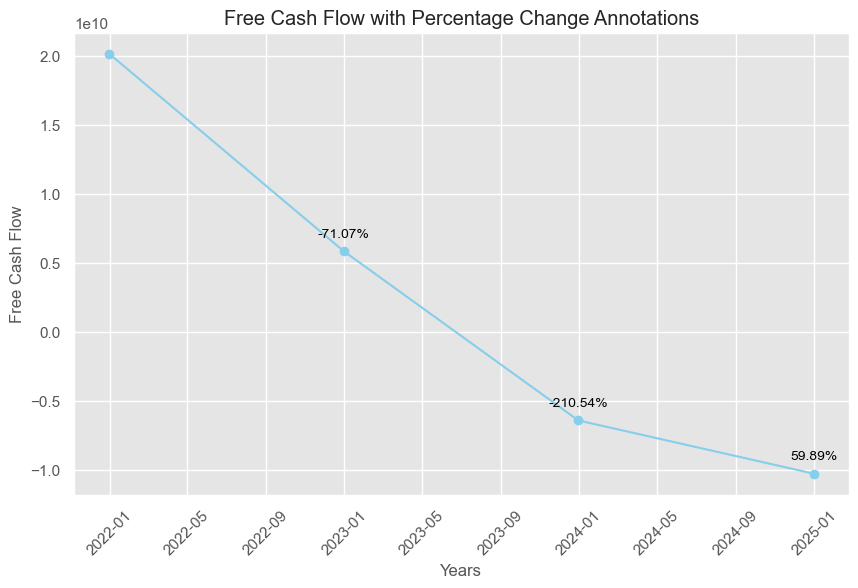

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Free Cash Flow data
ax.plot(free_cash_flow.index, free_cash_flow['Free Cash Flow'], marker = 'o', color = 'skyblue')

# Annotate the plot with percentage change values from free_cash_flow_pct_diff_df_T
for date, pct_change in free_cash_flow_pct_diff_df_T['% Change in Free Cash Flow'].items():
    if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
        # Adjust the text offset for better visibility below the markers
        ax.annotate(f'{pct_change:.2f}%', 
                    xy=(date, free_cash_flow.loc[date, 'Free Cash Flow']), 
                    xytext=(0, 10),  # Negative vertical offset to place text above the marker
                    textcoords='offset points',
                    fontsize=10, 
                    color='black', 
                    ha='center')  # Align text horizontally at the center of the point

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Free Cash Flow')
plt.title('Free Cash Flow with Percentage Change Annotations')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 5.2 Cash Flow DF

In [68]:
cash_flow_df = cash_flow.loc[['Operating Cash Flow','Investing Cash Flow', 'Financing Cash Flow']]
cash_flow_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Operating Cash Flow,1.715100e+10,1.935600e+10,2.849600e+10,3.863300e+10,NaN
Investing Cash Flow,-3.157300e+10,-1.981200e+10,-4.182200e+10,-2.612800e+10,NaN
Financing Cash Flow,1.114000e+10,1.600800e+10,4.225000e+09,-7.754000e+09,NaN


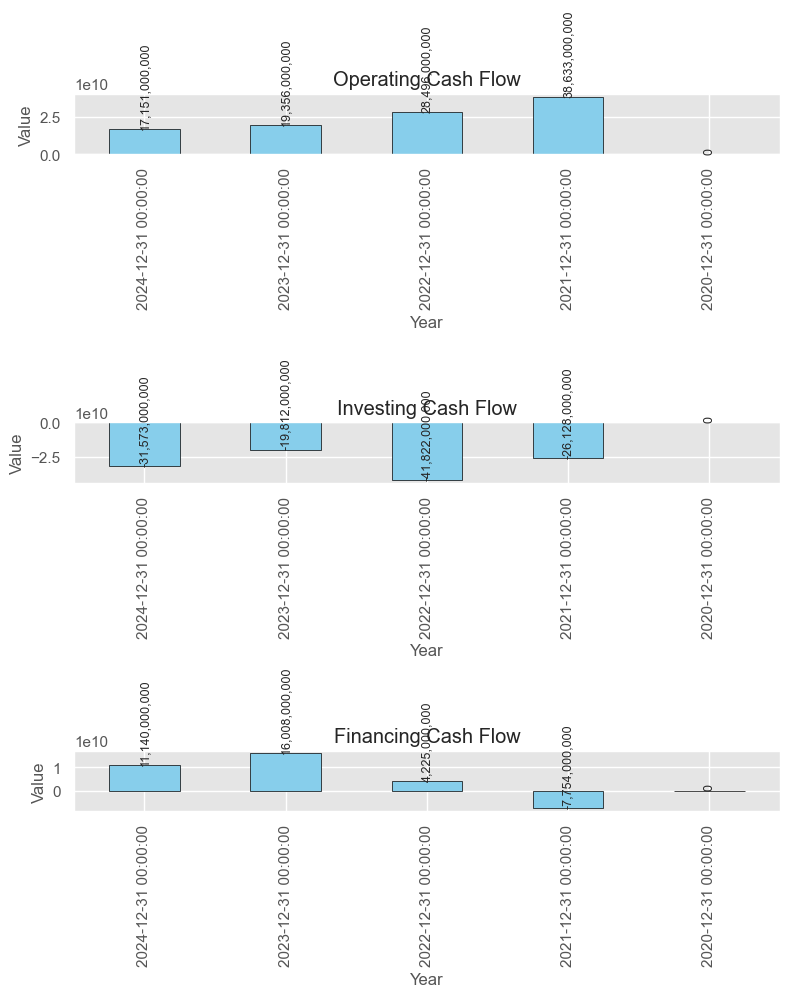

In [69]:
transposed_cash_flow_df = cash_flow_df.T

# Plot each column as a bar plot in subplots
transposed_cash_flow_df.plot(
    kind='bar',
    subplots=True,
    figsize=(8, 10),
    sharex=False,
    sharey=False,
    legend=False,  # Hide legends since column names are the titles
    color='skyblue',
    edgecolor='black',
)

# Add titles and layout adjustments
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(transposed_cash_flow_df.columns[i])  # Set column names as titles
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height):  # Annotate bar values
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:,.0f}",
                ha="center",
                va="bottom",
                fontsize=9,
                rotation=90,
            )

plt.tight_layout()
plt.show()

## 5.3 Percentage changes in Cash Flow DF

In [70]:
pct_diff_cash_flow_df = cash_flow_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(cash_flow_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_cash_flow_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_cash_flow_df

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Operating Cash Flow,-11.391816,-32.074677,-26.239226,NaN
Investing Cash Flow,59.363012,-52.627804,60.065830,NaN
Financing Cash Flow,-30.409795,278.887574,-154.488006,NaN


In [71]:
transposed_pct_diff_cash_flow_df = pct_diff_cash_flow_df.T
transposed_pct_diff_cash_flow_df

,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
2024 vs 2023,-11.391816,59.363012,-30.409795
2023 vs 2022,-32.074677,-52.627804,278.887574
2022 vs 2021,-26.239226,60.065830,-154.488006
2021 vs 2020,NaN,NaN,NaN


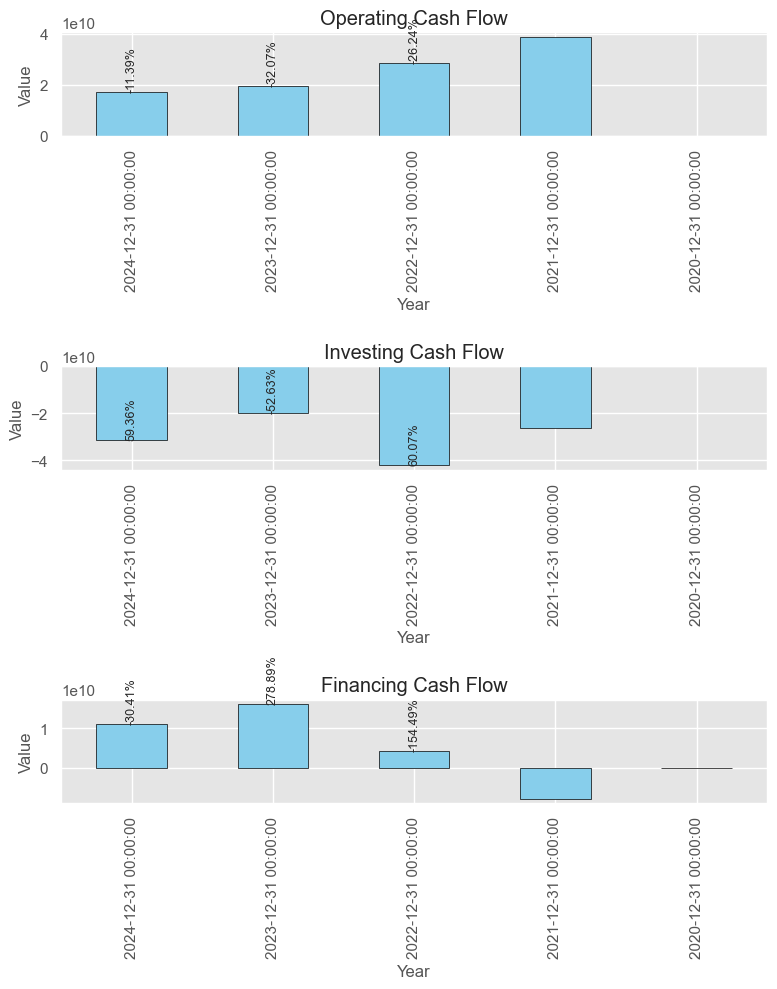

In [72]:
# Remove empty plots if any (subplots with no data)
fig, axes = plt.subplots(figsize=(8, 10), nrows=transposed_cash_flow_df.shape[1], ncols=1)

# Plot the raw cash flow data (values) and percentage changes
for i, ax in enumerate(axes):
    if i < transposed_cash_flow_df.shape[1]:  # Ensure we're within bounds
        # Plot each row (corresponding to a year) as a bar plot
        transposed_cash_flow_df.iloc[:, i].plot(
            kind='bar',
            ax=ax,
            color='skyblue',
            edgecolor='black',
            legend=False,
        )

        # Set the title and labels
        ax.set_title(transposed_cash_flow_df.columns[i])  # Set the title for each subplot
        ax.set_xlabel("Year")
        ax.set_ylabel("Value")

        # Add annotations for percentage changes
        for j, bar in enumerate(ax.patches):
            height = bar.get_height()

            if not pd.isna(height):  # Check if the value is not NaN
                # Extract the corresponding percentage change
                if j < len(transposed_pct_diff_cash_flow_df.index) and i < len(transposed_pct_diff_cash_flow_df.columns):
                    pct_change = transposed_pct_diff_cash_flow_df.iloc[j, i]  # Correct row and column access
                else:
                    pct_change = None

                if pd.notna(pct_change):  # Only annotate if the percentage change is available
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_height(),
                        f"{pct_change:.2f}%",  # Annotation with percentage change
                        ha="center",
                        va="bottom",
                        fontsize=9,
                        rotation=90,
                    )

plt.tight_layout()
plt.show()

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 6. Income Statement

In [73]:
income_statement = pd.DataFrame(stock.income_stmt).astype(float)
income_statement

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-3.611529e+08,-6.398032e+08,7.027440e+08,5.198230e+08,NaN
Tax Rate For Calcs,2.624660e-01,2.267200e-01,2.820000e-01,2.330000e-01,NaN
Normalized EBITDA,5.297400e+10,5.712400e+10,4.970800e+10,4.720200e+10,NaN
Total Unusual Items,-1.376000e+09,-2.822000e+09,2.492000e+09,2.231000e+09,NaN
Total Unusual Items Excluding Goodwill,-1.376000e+09,-2.822000e+09,2.492000e+09,2.231000e+09,NaN
Net Income From Continuing Operation Net Minority Interest,1.135100e+10,1.653200e+10,1.545700e+10,1.538200e+10,NaN
Reconciled Depreciation,3.134600e+10,2.756600e+10,2.848500e+10,2.733600e+10,NaN
Reconciled Cost Of Revenue,2.651840e+11,2.612990e+11,2.268660e+11,2.029590e+11,NaN
EBITDA,5.159800e+10,5.430200e+10,5.220000e+10,4.943300e+10,NaN
EBIT,2.025200e+10,2.673600e+10,2.371500e+10,2.209700e+10,NaN


## 6.1 Income Statement DF

In [74]:
income_statement_df = income_statement.loc[['Total Revenue','Total Expenses','Net Income Common Stockholders',
                                                'Diluted EPS']]
income_statement_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Total Revenue,3.246550e+11,3.222840e+11,2.790500e+11,2.501990e+11,NaN
Total Expenses,3.055010e+11,2.966470e+11,2.608420e+11,2.342470e+11,NaN
Net Income Common Stockholders,1.072100e+10,1.594700e+10,1.488100e+10,1.484300e+10,NaN
Diluted EPS,NaN,3.179000e+01,2.966000e+01,2.959000e+01,16.6


In [75]:
pct_diff_income_statement_df = income_statement_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(income_statement_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_income_statement_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_income_statement_df

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Total Revenue,0.735687,15.493281,11.531221,NaN
Total Expenses,2.984692,13.726700,11.353400,NaN
Net Income Common Stockholders,-32.771054,7.163497,0.256013,NaN
Diluted EPS,NaN,7.181389,0.236566,78.253012


In [76]:
transposed_df_income = income_statement_df.T
transposed_df_income

,Total Revenue,Total Expenses,Net Income Common Stockholders,Diluted EPS
2024-12-31,3.246550e+11,3.055010e+11,1.072100e+10,NaN
2023-12-31,3.222840e+11,2.966470e+11,1.594700e+10,31.79
2022-12-31,2.790500e+11,2.608420e+11,1.488100e+10,29.66
2021-12-31,2.501990e+11,2.342470e+11,1.484300e+10,29.59
2020-12-31,NaN,NaN,NaN,16.60


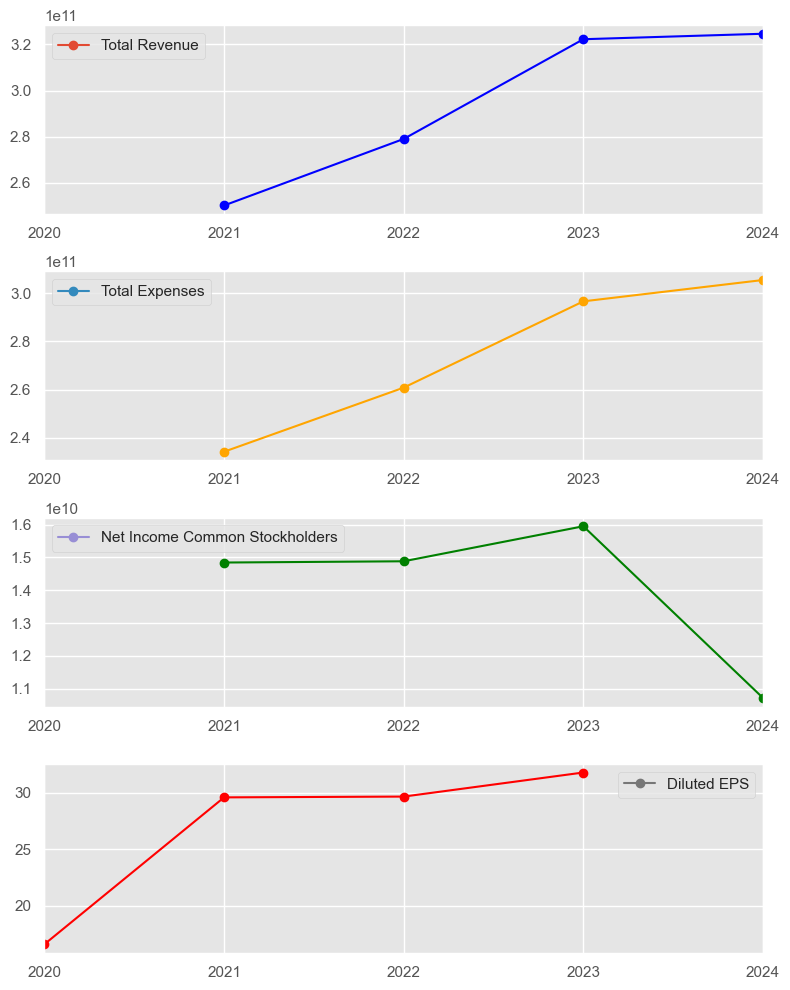

In [77]:
# Create subplots and assign unique colors
ax = transposed_df_income.plot(kind='line', marker='o', subplots=True, figsize=(8, 10), sharex=False, sharey=False)

# Assign distinct colors
for idx, axis in enumerate(ax):  # Loop through subplots
    color = colors[idx % len(colors)]  # Cycle through colors if needed
    for line in axis.get_lines():
        line.set_color(color)  # Apply unique color to each subplot

plt.tight_layout()
plt.show()

## 6.2 Percentage changes in Income Statement DF

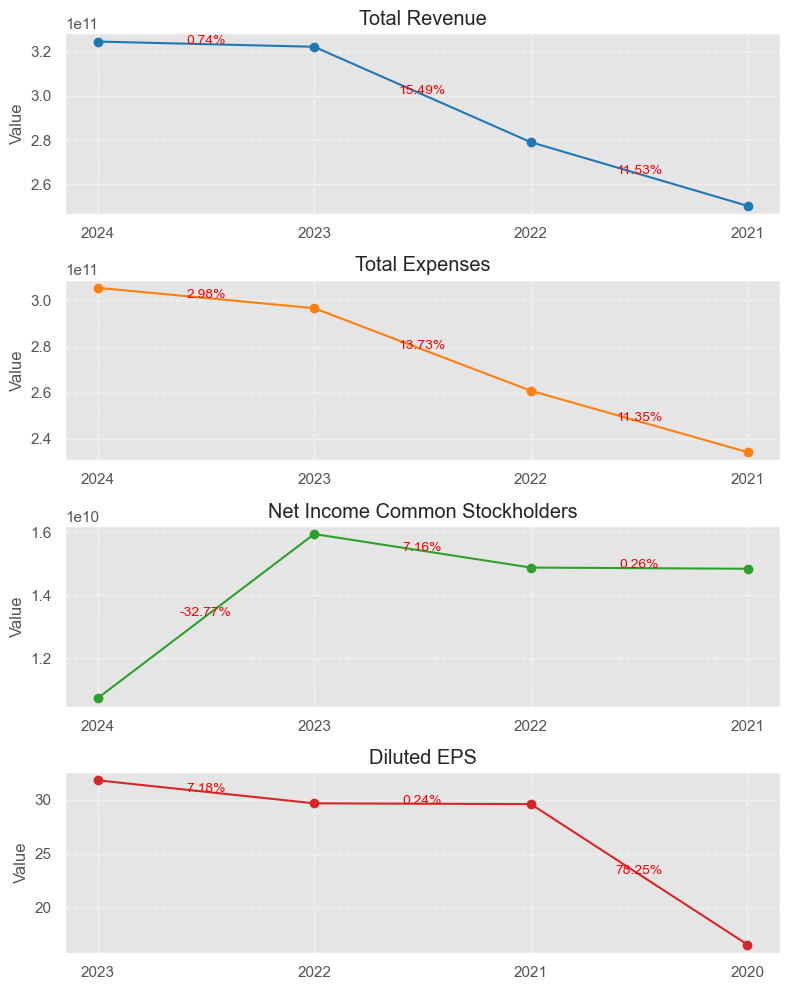

In [78]:
# Convert column names to years
years = [str(col.year) for col in income_statement_df.columns]

# Define colors
colors = plt.cm.tab10.colors

# Plot each row separately
fig, axes = plt.subplots(nrows=len(income_statement_df), figsize=(8, 10), sharex=False, sharey=False)

for idx, (ax, (row, values)) in enumerate(zip(axes, income_statement_df.iterrows())):
    color = colors[idx % len(colors)]  # Assign unique color
    ax.plot(years, values, marker='o', linestyle='-', label=row, color=color)
    ax.set_title(row)
    ax.set_ylabel("Value")
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Add percentage annotations
    pct_changes = pct_diff_income_statement_df.loc[row].values  # Convert to array for indexing
    for i in range(len(pct_changes)):
        if not np.isnan(pct_changes[i]):
            ax.text(i + 0.5, (values.iloc[i] + values.iloc[i+1]) / 2, f"{pct_changes[i]:.2f}%", 
                    fontsize=10, color='red', ha='center')

plt.tight_layout()
plt.show()

## 6.3 Income Statement for the last year with Vertical Analysis

In [79]:
income_statement_last = pd.DataFrame(income_statement.iloc[:,0])
income_statement_last

,2024-12-31
Tax Effect Of Unusual Items,-3.611529e+08
Tax Rate For Calcs,2.624660e-01
Normalized EBITDA,5.297400e+10
Total Unusual Items,-1.376000e+09
Total Unusual Items Excluding Goodwill,-1.376000e+09
Net Income From Continuing Operation Net Minority Interest,1.135100e+10
Reconciled Depreciation,3.134600e+10
Reconciled Cost Of Revenue,2.651840e+11
EBITDA,5.159800e+10
EBIT,2.025200e+10


In [80]:
revenue = income_statement_last.loc['Operating Revenue'].values[0]
income_statement_last['Percentage from Operating Revenue'] = income_statement_last.iloc[:, [0]] / revenue * 100
income_statement_last

,2024-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-3.611529e+08,-1.112421e-01
Tax Rate For Calcs,2.624660e-01,8.084459e-11
Normalized EBITDA,5.297400e+10,1.631701e+01
Total Unusual Items,-1.376000e+09,-4.238345e-01
Total Unusual Items Excluding Goodwill,-1.376000e+09,-4.238345e-01
Net Income From Continuing Operation Net Minority Interest,1.135100e+10,3.496327e+00
Reconciled Depreciation,3.134600e+10,9.655172e+00
Reconciled Cost Of Revenue,2.651840e+11,8.168179e+01
EBITDA,5.159800e+10,1.589318e+01
EBIT,2.025200e+10,6.238006e+00


## 6.4 Income Statement for the previous year with Vertical Analysis

In [81]:
income_statement_prev = pd.DataFrame(income_statement.iloc[:,1])
income_statement_prev

,2023-12-31
Tax Effect Of Unusual Items,-6.398032e+08
Tax Rate For Calcs,2.267200e-01
Normalized EBITDA,5.712400e+10
Total Unusual Items,-2.822000e+09
Total Unusual Items Excluding Goodwill,-2.822000e+09
Net Income From Continuing Operation Net Minority Interest,1.653200e+10
Reconciled Depreciation,2.756600e+10
Reconciled Cost Of Revenue,2.612990e+11
EBITDA,5.430200e+10
EBIT,2.673600e+10


In [82]:
revenue = income_statement_prev.loc['Operating Revenue'].values[0]
income_statement_prev['Percentage from Operating Revenue'] = income_statement_prev.iloc[:, [0]] / revenue * 100
income_statement_prev

,2023-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-6.398032e+08,-1.985216e-01
Tax Rate For Calcs,2.267200e-01,7.034789e-11
Normalized EBITDA,5.712400e+10,1.772474e+01
Total Unusual Items,-2.822000e+09,-8.756252e-01
Total Unusual Items Excluding Goodwill,-2.822000e+09,-8.756252e-01
Net Income From Continuing Operation Net Minority Interest,1.653200e+10,5.129637e+00
Reconciled Depreciation,2.756600e+10,8.553326e+00
Reconciled Cost Of Revenue,2.612990e+11,8.107725e+01
EBITDA,5.430200e+10,1.684911e+01
EBIT,2.673600e+10,8.295789e+00


## 6.5 Income Statement for the last two years with Vertical Analysis

In [83]:
df_concat_income = pd.concat([income_statement_last, income_statement_prev], axis=1)
df_concat_income

,2024-12-31 00:00:00,Percentage from Operating Revenue,2023-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-3.611529e+08,-1.112421e-01,-6.398032e+08,-1.985216e-01
Tax Rate For Calcs,2.624660e-01,8.084459e-11,2.267200e-01,7.034789e-11
Normalized EBITDA,5.297400e+10,1.631701e+01,5.712400e+10,1.772474e+01
Total Unusual Items,-1.376000e+09,-4.238345e-01,-2.822000e+09,-8.756252e-01
Total Unusual Items Excluding Goodwill,-1.376000e+09,-4.238345e-01,-2.822000e+09,-8.756252e-01
Net Income From Continuing Operation Net Minority Interest,1.135100e+10,3.496327e+00,1.653200e+10,5.129637e+00
Reconciled Depreciation,3.134600e+10,9.655172e+00,2.756600e+10,8.553326e+00
Reconciled Cost Of Revenue,2.651840e+11,8.168179e+01,2.612990e+11,8.107725e+01
EBITDA,5.159800e+10,1.589318e+01,5.430200e+10,1.684911e+01
EBIT,2.025200e+10,6.238006e+00,2.673600e+10,8.295789e+00


In [84]:
df_concat_income.loc['Operating Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  324655000000.000000
Percentage from Operating Revenue             100.000000
2023-12-31 00:00:00                  322284000000.000000
Percentage from Operating Revenue             100.000000
Name: Operating Revenue, dtype: object

In [85]:
df_concat_income.loc['Cost Of Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)


2024-12-31 00:00:00                  265184000000.000000
Percentage from Operating Revenue              81.681785
2023-12-31 00:00:00                  261299000000.000000
Percentage from Operating Revenue              81.077249
Name: Cost Of Revenue, dtype: object

In [86]:
df_concat_income.loc['Gross Profit'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  59471000000.000000
Percentage from Operating Revenue             18.318215
2023-12-31 00:00:00                  60985000000.000000
Percentage from Operating Revenue             18.922751
Name: Gross Profit, dtype: object

In [87]:
df_concat_income.loc['Operating Expense'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  40317000000.000000
Percentage from Operating Revenue             12.418413
2023-12-31 00:00:00                  35348000000.000000
Percentage from Operating Revenue             10.967966
Name: Operating Expense, dtype: object

In [88]:
df_concat_income.loc['Operating Income'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  19154000000.000000
Percentage from Operating Revenue              5.899801
2023-12-31 00:00:00                  25637000000.000000
Percentage from Operating Revenue              7.954785
Name: Operating Income, dtype: object

In [89]:
df_concat_income.loc['Net Income Common Stockholders'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  10721000000.000000
Percentage from Operating Revenue              3.302275
2023-12-31 00:00:00                  15947000000.000000
Percentage from Operating Revenue              4.948120
Name: Net Income Common Stockholders, dtype: object

In [90]:
df_concat_income.loc['EBITDA'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  51598000000.000000
Percentage from Operating Revenue             15.893179
2023-12-31 00:00:00                  54302000000.000000
Percentage from Operating Revenue             16.849114
Name: EBITDA, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 7. Ratio Analysis

__Gross Profit Margin__

In [91]:
gross_profit_margin = (income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) - income_statement.loc['Cost Of Revenue'].replace(0, np.nan).astype(float)) / income_statement_df.loc['Total Revenue'].replace(0, np.nan).astype(float) * 100
gross_profit_margin

2024-12-31    18.318215
2023-12-31    18.922751
2022-12-31    18.700591
2021-12-31    18.880971
2020-12-31          NaN
dtype: float64

__Operating Profit Margin__

In [92]:
operating_profit_margin = (income_statement.loc['Operating Income'].replace(0, np.nan).astype(float) /  income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
operating_profit_margin

2024-12-31    5.899801
2023-12-31    7.954785
2022-12-31    6.524996
2021-12-31    6.375725
2020-12-31         NaN
dtype: float64

__Net Profit Margin__

In [93]:
net_profit_margin = (income_statement.loc['Net Income'].replace(0, np.nan).astype(float)/ income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
net_profit_margin

2024-12-31    3.496327
2023-12-31    5.129637
2022-12-31    5.539151
2021-12-31    6.147906
2020-12-31         NaN
dtype: float64

__Current Ratio__

In [94]:
current_ratio = balance_sheet_df.loc['Current Assets'].replace(0, np.nan).astype(float) / balance_sheet_df.loc['Current Liabilities'].replace(0, np.nan).astype(float)
current_ratio

2024-12-31    1.129894
2023-12-31    1.163117
2022-12-31    1.226769
2021-12-31    1.218708
2020-12-31         NaN
dtype: float64

__Accounts Receivable Turnover__ <br>
The Accounts Receivable Turnover Ratio measures how efficiently a company collects its receivables. A higher ratio indicates effective collection processes and efficient use of assets.

In [95]:
ART = (income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) - income_statement.loc['Net Income'].replace(0, np.nan).astype(float)) / balance_sheet_df.loc['Accounts Receivable'] 
ART

2024-12-31    4.628717
2023-12-31    4.549678
2022-12-31    4.378476
2021-12-31    4.451507
2020-12-31         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 8. ROIC & WACC

__ROIC__

In [96]:
nopat = income_statement.loc["EBIT"].replace(0, np.nan).astype(float) * (1 - income_statement.loc["Tax Provision"] / income_statement.loc["Pretax Income"].replace(0, np.nan).astype(float))
nopat

2024-12-31    1.493654e+10
2023-12-31    2.067442e+10
2022-12-31    1.703461e+10
2021-12-31    1.693891e+10
2020-12-31             NaN
dtype: float64

In [97]:
invested_capital = balance_sheet_df.loc['Long Term Debt And Capital Lease Obligation'].replace(0, np.nan).astype(float) + balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
invested_capital

2024-12-31    3.154270e+11
2023-12-31    2.940530e+11
2022-12-31    2.844710e+11
2021-12-31    2.734780e+11
2020-12-31             NaN
dtype: float64

In [98]:
balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)

2024-12-31    1.822940e+11
2023-12-31    1.749680e+11
2022-12-31    1.653760e+11
2021-12-31    1.444490e+11
2020-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [99]:
ROIC = nopat / invested_capital
ROIC

2024-12-31    0.047353
2023-12-31    0.070308
2022-12-31    0.059882
2021-12-31    0.061939
2020-12-31         NaN
dtype: float64

__WACC__

In [100]:
def calculate_wacc(E, D, Ke, Kd, tax_rate):
    equity_weight = E / (E + D)
    debt_weight = D / (E + D)
    wacc = (equity_weight * Ke) + (debt_weight * Kd) * (1 - tax_rate)
    return wacc

In [101]:
E = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
D = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
Ke = 0.1
Kd = 0.06
tax_rate = 0.3

In [102]:
wacc_result = calculate_wacc(E, D, Ke, Kd, tax_rate)
wacc_result

2024-12-31    0.076161
2023-12-31    0.077155
2022-12-31    0.076356
2021-12-31    0.073222
2020-12-31         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 9. Long-term Debt to Equity Ratio & ICR

__DE__

In [103]:
long_term_debt = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
long_term_debt

2024-12-31    1.272090e+11
2023-12-31    1.137040e+11
2022-12-31    1.138120e+11
2021-12-31    1.238920e+11
2020-12-31             NaN
Name: Long Term Debt, dtype: float64

In [104]:
equity = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
equity

2024-12-31    1.822940e+11
2023-12-31    1.749680e+11
2022-12-31    1.653760e+11
2021-12-31    1.444490e+11
2020-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [105]:
debt_equity_ratio = long_term_debt / equity
debt_equity_ratio

2024-12-31    0.697823
2023-12-31    0.649856
2022-12-31    0.688201
2021-12-31    0.857687
2020-12-31         NaN
dtype: float64

__ICR__

In [106]:
EBIT = income_statement.loc['EBIT'].replace(0, np.nan).astype(float)
EBIT

2024-12-31    2.025200e+10
2023-12-31    2.673600e+10
2022-12-31    2.371500e+10
2021-12-31    2.209700e+10
2020-12-31             NaN
Name: EBIT, dtype: float64

In [107]:
interest_expense = income_statement.loc['Interest Expense'].replace(0, np.nan).astype(float)
interest_expense

2024-12-31    3.446000e+09
2023-12-31    3.637000e+09
2022-12-31    1.645000e+09
2021-12-31    1.971000e+09
2020-12-31             NaN
Name: Interest Expense, dtype: float64

In [108]:
ICR = EBIT / interest_expense
ICR

2024-12-31     5.876959
2023-12-31     7.351114
2022-12-31    14.416413
2021-12-31    11.211060
2020-12-31          NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 10. Total Debt to Free Cash Flow

In [109]:
total_debt = balance_sheet_df.loc['Long Term Debt And Capital Lease Obligation'].replace(0, np.nan).astype(float) + balance_sheet_df.loc['Current Debt'].replace(0, np.nan).astype(float)
total_debt

2024-12-31    1.952680e+11
2023-12-31    1.928600e+11
2022-12-31    1.773340e+11
2021-12-31    1.822620e+11
2020-12-31             NaN
dtype: float64

In [110]:
free_cash_flow = cash_flow.loc['Free Cash Flow'].replace(0, np.nan).astype(float)
free_cash_flow

2024-12-31   -1.029500e+10
2023-12-31   -6.439000e+09
2022-12-31    5.825000e+09
2021-12-31    2.013500e+10
2020-12-31             NaN
Name: Free Cash Flow, dtype: float64

In [111]:
total_debt_To_free_cash_flow = total_debt / free_cash_flow
total_debt_To_free_cash_flow

2024-12-31   -18.967266
2023-12-31   -29.951856
2022-12-31    30.443605
2021-12-31     9.051999
2020-12-31          NaN
dtype: float64

__Indicates how many years it would take to pay off debt using FCF.__ <br>
__Low ratio (<3 years) → Strong financial position (company can pay off debt quickly).<br>
High ratio (>5 years) → Potential debt repayment risk.<br>
Negative FCF → The ratio is meaningless since the company isn't generating enough cash.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 11. Operating Cash to Total Debt

In [112]:
operating_cash = cash_flow.loc['Operating Cash Flow'].replace(0, np.nan).astype(float)
operating_cash

2024-12-31    1.715100e+10
2023-12-31    1.935600e+10
2022-12-31    2.849600e+10
2021-12-31    3.863300e+10
2020-12-31             NaN
Name: Operating Cash Flow, dtype: float64

In [113]:
total_debt = balance_sheet_df.loc['Total Debt'].replace(0, np.nan).astype(float)
total_debt

2024-12-31    1.965200e+11
2023-12-31    1.939720e+11
2022-12-31    1.784360e+11
2021-12-31    1.833700e+11
2020-12-31             NaN
Name: Total Debt, dtype: float64

In [114]:
operating_cash_To_total_debt = operating_cash / total_debt
operating_cash_To_total_debt

2024-12-31    0.087274
2023-12-31    0.099788
2022-12-31    0.159699
2021-12-31    0.210683
2020-12-31         NaN
dtype: float64

__When Operating Cash to Debt ratio is close to 100% or 1, quick measure confirming that company has solid financials to pay off debt.__ <br>
__> 0.2 (20%)	Healthy cash flow compared to debt. The company can cover its debt.__ <br>
__≈ 0.1 to 0.2 (10-20%)	Moderate coverage. The company generates enough cash flow, but managing its debt levels could be challenging if cash flow drops.__ <br>
__< 0.1 (10%)	Low cash flow relative to debt. The company is at risk if there are downturns, as it may struggle to meet debt obligations.__ <br>
__< 0 (negative)	Negative operating cash flow. The company is not generating enough cash from operations to cover its debt and might be relying on external financing.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 12. Operating Cash to Market capitalization

In [115]:
operating_cash_last = cash_flow.loc['Operating Cash Flow'].iloc[0]
operating_cash_last

17151000000.0

In [116]:
operating_cash_To_market_cap = operating_cash_last / market_cap
operating_cash_To_market_cap

0.3140293594166266

In [117]:
dif_for_non_current_assets = market_cap - operating_cash_last
dif_for_non_current_assets

37464912448.0

In [118]:
real_non_current_assets = balance_sheet_df.iloc[:,0].loc['Total Non Current Assets']
real_non_current_assets

387674000000.0

__When Cash to Market Cap > 0.7 (>70%), market is valuing rest of balance sheet potentially at scrap prices / liquidation prices.__<br>
__> 10% (0.10)	Strong cash flow relative to market value. The stock may be undervalued.__<br>
__≈ 5%-10% (0.05 - 0.10) ==> Healthy cash generation. A balanced valuation.__<br>
__< 5% (0.05)	Low cash flow compared to market cap. The stock may be overvalued or focused on growth.__<br>
__< 0 (negative)	Negative cash flow—company may be burning cash. Possible financial distress.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 13. Operating Cash to Net Income 

In [119]:
operating_cash = cash_flow.loc['Operating Cash Flow'].replace(0, np.nan).astype(float)
operating_cash

2024-12-31    1.715100e+10
2023-12-31    1.935600e+10
2022-12-31    2.849600e+10
2021-12-31    3.863300e+10
2020-12-31             NaN
Name: Operating Cash Flow, dtype: float64

In [120]:
net_income = income_statement_df.loc['Net Income Common Stockholders'].replace(0, np.nan).astype(float)
net_income

2024-12-31    1.072100e+10
2023-12-31    1.594700e+10
2022-12-31    1.488100e+10
2021-12-31    1.484300e+10
2020-12-31             NaN
Name: Net Income Common Stockholders, dtype: float64

In [121]:
operating_cash_To_net_income = operating_cash / net_income
operating_cash_To_net_income

2024-12-31    1.599757
2023-12-31    1.213771
2022-12-31    1.914925
2021-12-31    2.602776
2020-12-31         NaN
dtype: float64

__> 1 Strong cash flow. The company generates more cash than its reported net income (good for financial health).__ <br>
__≈ 1	Net income and cash flow are closely aligned, suggesting good earnings quality.__ <br>
__< 1	Earnings are higher than cash flow. Possible reasons: aggressive revenue recognition, high non-cash expenses, or rising working capital.__ <br>
__< 0 (negative)	Operating cash flow is negative, meaning the company burns cash while reporting net income (could signal financial distress).__


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font>